In [52]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np

In [7]:
#load the training dataset
train_data = pd.read_csv("../data/train.csv")

#Display the first 5 rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Load the test dataset
test_data= pd.read_csv("../data/test.csv")

#Display the first 5 rows
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#Get overview of training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#Checking for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Getting summary statistics for numeric columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#Getting summary of all columns
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## What Do Labels Reperesent

- **Survived**: Passenger survived or not (0 = Not Survived, 1 = Survived)
- **Pclass**: Class of Passengers (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Sex**: Gender of Passenger
- **Age**: Age of passenger
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Fare**: Ticket fare
- **Embarked**: Port where the passenger emabarked (C = Cherburg, Q = Queenstown, S = Southampton)

## Initial Observations

### Missing Values:
*[Based on results from .isnull().sum()]* 
- `Age`: Contains missing values. It's a crticial feature for analysis, need to fill in missing values
- `Cabin`: A large ammount of values are missing. This feature is most likely not needed unless patterns cana be identified
- `Embarked`: Contains some missing values, could be filled in using the most frequent values?

### Categorical Features:
*[Based on results from .describe(include="all")]*
- `Sex`: Contains two unique calues (`male`, `female`)
- `Embarked`: Contains three unique values (`C`, `Q`, `S`)
- **Both thes features need need to be encoded into numeric values for modeling to work**

### Potentially Irrelevant Features:
- `PassengerId`: Likely irrelevant to survival, so it can be dropped
- `Name`: Names wouldn't have an impact on survivability, however may have valuable information (e.g., Mr. or Mrs.). Would require encoding
- `Ticket`: No immediate releveance can be discerned. If it remains to be the case after further analysis then this feature will be dropped


In [13]:
# Count values for eaach target class
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
#Calculate percentage oof each target class
train_data["Survived"].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

## Target Dsitribution

### Distribtuion (Raw Counts):
- 0 (Did not survive): 549 passengers did not survive (61.6%)
- 1 (did survive): 342 passengers did survive (38.4%)

### Observations:
- At first glance the data set is slightly imbalanced with more passenger not surviving compared to those who did not survive
- This imbalance is not extreme, however it can still influence machine learning models. Careful evaluation of model performance of both classes is required

In [33]:
#Reloading original dataset due to personal error:
train_data = pd.read_csv("../data/train.csv")

In [34]:
# Calculate percentage of missing values for each column
missing_percentage = train_data.isnull().sum() / len(train_data) * 100

# Display missing percentage
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [35]:
# Fill missing Age values with the median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [36]:
# Drop the Cabin column
train_data = train_data.drop(columns=['Cabin'])

In [37]:
# Fill missing Embarked values with the mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [38]:
# Verify there are no missing values left
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Handling Missing Data:

1. **Age**:
   - Missing values: 177
   - Filled missing values with the median (`Age` is a critical feature, and using median avoids bias from outliers).

2. **Cabin**:
   - Missing values: 687 (over 77% of the data is missing).
   - Dropped this column due to excessive missing values and lac of relavance to survival.

3. **Embarked**:
   - Missing values: 2
   - Filled missing values with the mode (`S`, the most frequent value, to preserve distribution).


In [39]:
#Sumary statistics for numeric columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
#Summary of categorical features
train_data.describe(include="object")

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,646


In [42]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [43]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [45]:
train_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [46]:
train_data['Age'].value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [47]:
train_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [48]:
train_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [49]:
train_data.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [50]:
# Compare age distribution for survived vs. not survived
train_data[['Age', 'Survived']].groupby('Survived').describe()

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         549.0  30.028233  12.499986  1.00  23.0  28.0  35.0  74.0
1         342.0  28.291433  13.764425  0.42  21.0  28.0  35.0  80.0

<function matplotlib.pyplot.show(close=None, block=None)>

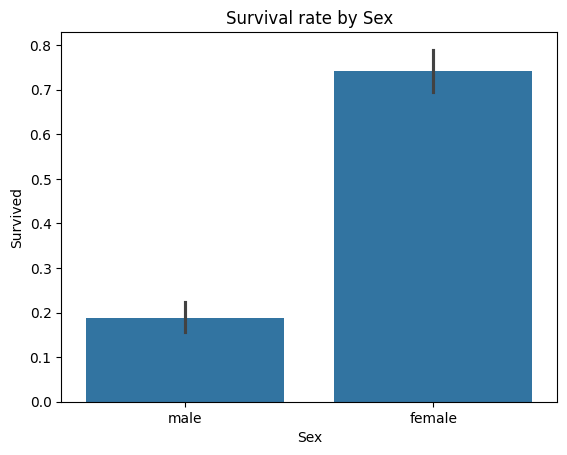

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

#Bar plot for survival by sex
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival rate by Sex')
plt.show

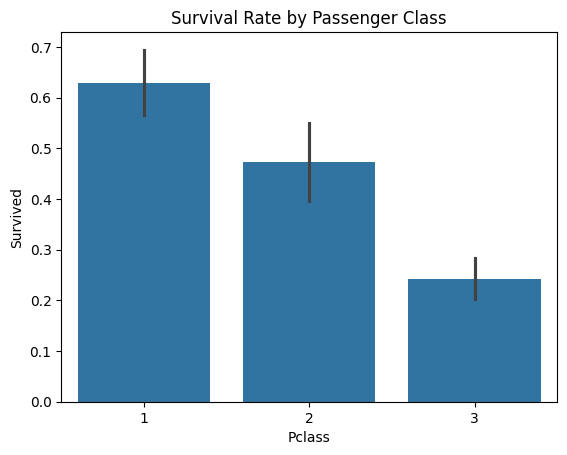

In [55]:
#Bar plot for survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

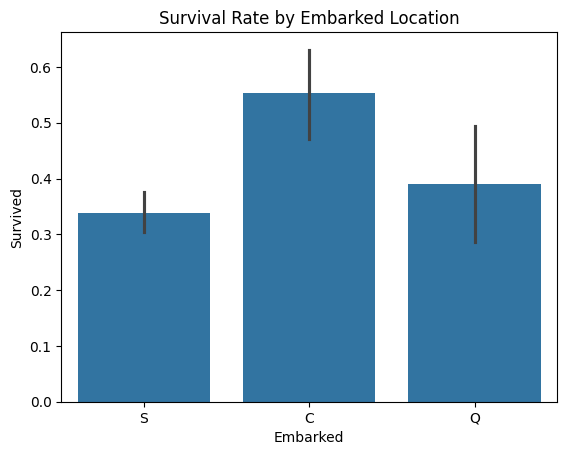

In [56]:
# Bar plot for survival by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked Location')
plt.show()

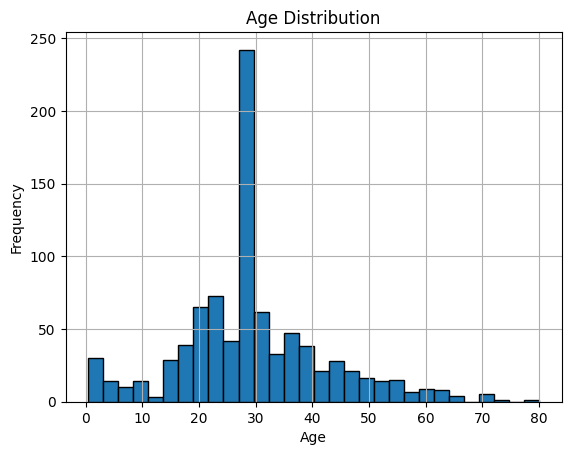

In [57]:
#Histogram of Age
train_data['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

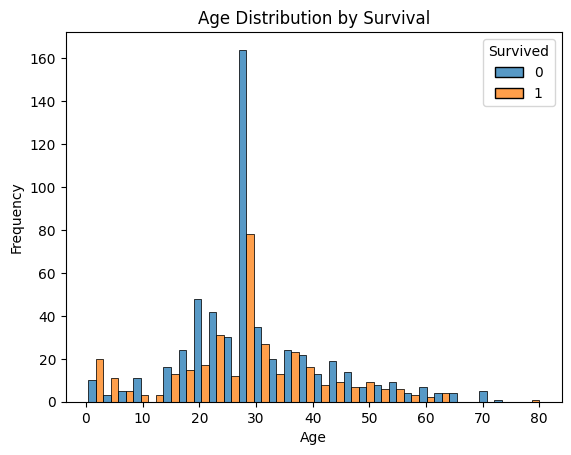

In [59]:
# Histogram of Age by Survival
sns.histplot(data=train_data, x='Age', hue='Survived', bins=30, multiple='dodge', kde=False)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### EDA Conclusions:
1. **Influential Features**:
   - `Sex`: Women had a significantly higher survival rate.
   - `Pclass`: First-class passengers had much higher survival rates compared to second- and third-class passengers.
   - `Embarked`: Passengers who embarked at Cherbourg (`C`) had a higher survival rate.
   - `Age`: Younger passengers (e.g., children

2. **Feature Engineering Ideas**:
   - Create a `FamilySize` feature by combining `SibSp` and `Parch`.
   - Extract titles from the `Name` column (e.g., `Mr.`, `Mrs.`, `Miss`).

3. **Data Processing Required**:
   - Encode categorical variables (`Sex`, `Embarked`).
   - Scale numerical features (e.g., `Age`, `Fare`) for model consistency.
